# SoftDes Midterm Project: ***Google Trends vs EIU Index Changes***
#### Authors: Arnav Gupta and Rohith Tatineni
#### Erhardt 4
***


***Please run the following code blocks below to ensure the computational essay can run accurately*** 

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
pip install pytrends

In [2]:
import plot_country
import gapminder_data_manipulation
import matplotlib.pyplot as plt

# Connecting to Google
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)


### Introduction

> We are trying to answer the question: *Are individuals in the USA with access to Google culturally aware (or care) of international democracy changes?*

> This question is interesting to explore because we want to see if individuals are searching for international democracy changes. If there were extreme changes in a country, it would be generally a good sign for people to be searching for such changes, as this would likely mean individuals are better at being global citizens. 

> We took data from Google Trends, where Google stores search popularity overtime on its search engine. Pytrends is an unofficial API for collecting Google Trends data, so Google or another affiliated party may take pytrends down at any time, or Google may change their backend data, which may affect this report's usability. You may read more about Pytrends here: https://pypi.org/project/pytrends/. We used this tool to grasp an initial understanding of what our data was and what it means and look at areas to explore or specify. For example, we decided to restrict our searches to the US as it would be biased to not include non-English terms in our searches.

> Our EIU data is from Gapminder, can be found here https://www.gapminder.org/data/. We calculated the democracy index from 60 indicators that are divided into five sub-indexes. These sub-indexes are the Electoral Pluralism index, Government Index, Political Participation index, Political culture index, and the Civil liberty index. The data we looked at tracked the EIU democracy index of every country for each year from 2006 to 2018.

### Methodology
#### Gapminder Data
> The EIU Index data was directly downloaded from the Gapminder website as a .csv. This data is saved in our directory as `EIU_Democracy_Index.csv()`. The average EIU Index score is .549. This CSV was then converted to a pandas data frame using the function `create_data_frame()`:
```
    dataframe = pandas.read_csv(filename)
    return dataframe
```

> The downloaded data has democracy indexed for every country. To best answer, the question, only specific countries' democracy indexes were looked at. Since the question is looking at democracy change, only countries with a specific change in democracy indexes from 2006 to 2018. The function `get_greatest_variance_countries()` takes an input `threshold` and was used to get a list of countries that had a variance in their democracy index data above the threshold.  
```
    countries_above_threshold = []
    dataframe = create_dataFrame("EIU_Democracy_Index.csv")
    for i in range(164):
        temp = dataframe.iloc[i, 1:14]
        if statistics.pstdev(temp) > threshold:
            countries_above_threshold.append(i)
    return countries_above_threshold
```
> The function `get_specific_countries_data()` was used to get the data from pandas data frame for each country in the list generated from `get_greatest_variance_countries()`. This data is stored in a dictionary with the key as the country name and the value as a pandas data frame of the democracy indexes. Storing the data in a dictionary allows country data to be accessed by name instead of the index and allows for easier implementation when plotting the data.
```
    data = {}
    country_name_list = get_country_name_list("EIU_Democracy_Index.csv")
    for index in country_list:
        data[country_name_list[index]] = dataframe.iloc[index, 1:14]
    return data
```

#### Google Trends Data
> The Google Trends data was accessed using an API called *Pytrends*. We used Pytrends to collect the historical interest of specified keywords from 2006 to 2018 per month. We chose keywords for countries based off the metrics used to calculate EIU democracy indexes. For example, we looked at *Tunisia Democracy*, *Tunisia Corruption*, *Tunisia Government*, *Myanmar Democracy*, *Myanmar Government*, *Libya Democracy*, *Libya Government*, *Fiji Government*, and *Fiji Election*. The data is normalized on a scale from 0-100, where 100 would be the highest interest, and 0 would least interest. In this case, all historical interest is in the scope of just the United States. We saved the data with `make_csv()`:
```
    pytrends.build_payload(country_list, cat=0, timeframe='all',
                           geo='US', gprop='')
    data = pytrends.interest_over_time()
    data = data[country_list]
    name = csv_name(country_list)
    data.to_csv(r'pytrends_data/'+name+'.csv')
 ```  
 > The function above pings Google with specified parameters, keeping only data that is referred in the *country_list*, and saves the CSV utilizing the function `csvName()`:
 ```
    string_country = "_".join(string_list)
    string_country = string_country.replace(" ", "")
    return string_country
 ```
 > This essentially removes all the spaces and puts a '\_' between each item of the list. 
 > The data is read with `readCSV()`:
 ```
    name = csv_name(country_list)
    if not path.exists('pytrends_data/'+name+'.csv'):
        make_csv(country_list)
    data = pd.read_csv('pytrends_data/'+name+'.csv')
    return data
 ``` 
 > In case the CSV did not exist, it will create the CSV in the *pytrends_data* folder. The data is saved in a CSV to avoid pinging google several times. The data was processed using *Pandas* and its data frame methods. This data was plotted to show graphs of rolling averages, rate of changes, histograms, boxplots, and interest over time. 
 
### Results
#### Plotting Data
> The function `plot_histogram_all_data()` was used to plot all the data from the Gapminder data set in a histogram. This histogram provides context to the Gapminder data. The bimodal nature of the histogram indicates that the data tend to cluster above or below average. This means that countries tend to be below or above average.

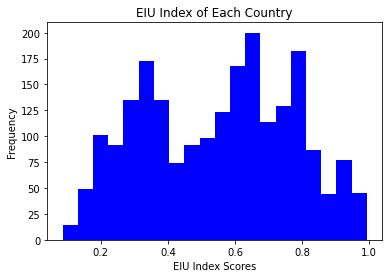

In [3]:
gapminder_data_manipulation.plot_histogram_all_data()

> The function `boxplots(country_data, keyword)` plots the interest over time data into a boxplot. The parameter, *country_data* is the data frame and *keyword* is the specific column of the data frame as a string. The histogram below shows us the spread of the data and how much this was searched on average over time. ***For reference, the USA's average index score is .811.*** As we can see, this is interesting to compare over countries to see differences in averages and what people in the US are generally interested in. "*USA Government*" can be an example: 

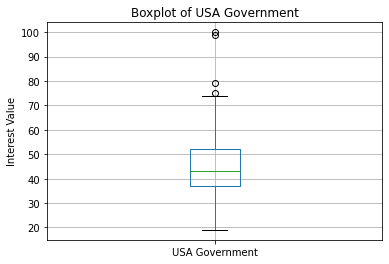

In [10]:
kw_list_usa = ["USA Government"]
usa_data = plot_country.country_data_pytrend(kw_list_usa)
plot_country.boxplots(usa_data, kw_list_usa[0])

> "*USA Government*" is regularly searched from 2006-2018 with a median search interest of about 42. 

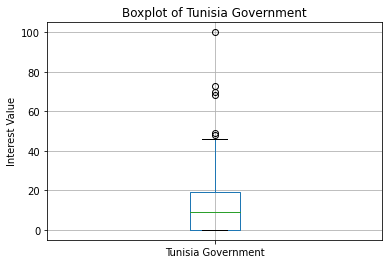

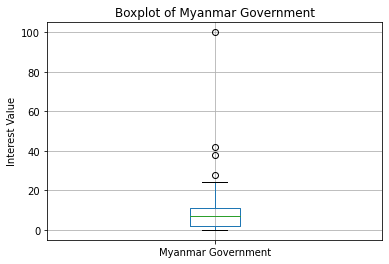

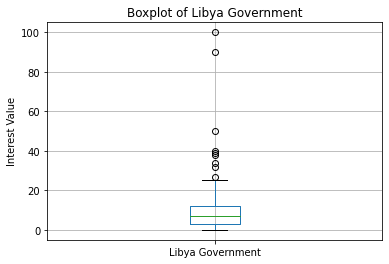

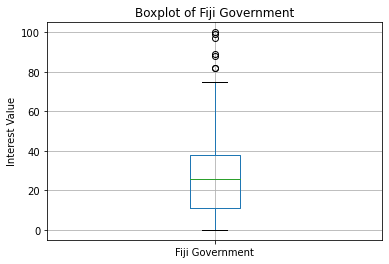

In [9]:
kw_list_tunisia = ["Tunisia Government"]
tunisia_data = plot_country.country_data_pytrend(kw_list_tunisia)
plot_country.boxplots(tunisia_data, kw_list_tunisia[0])

kw_list_myanmar = ["Myanmar Government"]
myanmar_data = plot_country.country_data_pytrend(kw_list_myanmar)
plot_country.boxplots(myanmar_data, kw_list_myanmar[0])

kw_list_libya = ["Libya Government"]
libya_data = plot_country.country_data_pytrend(kw_list_libya)
plot_country.boxplots(libya_data, kw_list_libya[0])

kw_list_fiji = ["Fiji Government"]
fiji_data = plot_country.country_data_pytrend(kw_list_fiji)
plot_country.boxplots(fiji_data, kw_list_fiji[0])

> "*Tunisia Government*" is not as regularly searched like "*USA Government*". Although, there are more outliers in "*Tunisia Government*", which shows that there were unique times of several high interest. This helps us understand how much people search about other countries through a statistical spread for all the countries in a simple, easy to comprehend form.

> To visualize and compare the data from both data sets, both data sets were plotted as line graphs. The function `plot_chosen_countries()` was used to plot the selected data from the Gapminder dataset. `make_plots()` was used to plot the selected data from pytrends.

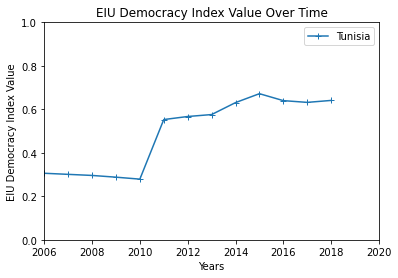

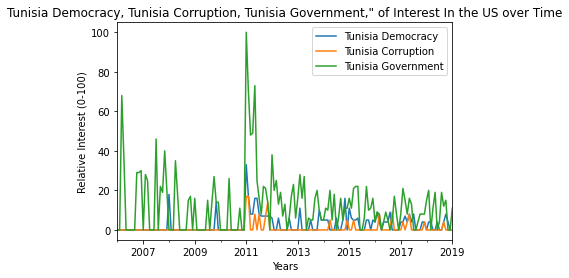

In [13]:
# Plotting EIU data
threshold_list = gapminder_data_manipulation.get_greatest_variance_countries(0.09)
gapminder_data_manipulation.plot_chosen_countries([threshold_list[3]])

# Plotting pytrend data
kw_list_tunisia_terms = ["Tunisia Democracy", "Tunisia Corruption", "Tunisia Government"]
tunisia_data_terms = plot_country.country_data_pytrend(kw_list_tunisia_terms)
plot_country.make_plots(tunisia_data_terms, kw_list_tunisia_terms)

> When analyzing the graphs visually, there is a direct relationship between the democracy index data and the Tunisia Google Trends data. A change in the democracy index data simultaneously has a spike in the google trends data. In 2011, Tunisia's democracy index increases by ~.2 points, and at that time there is an increase in all Google Trends search terms. Interestingly, in 2008 there are spikes in the Tunisia interest search terms, though there the EIU index value is stagnant during this time. 

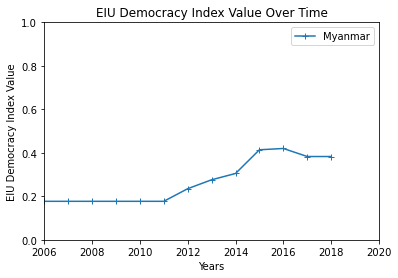

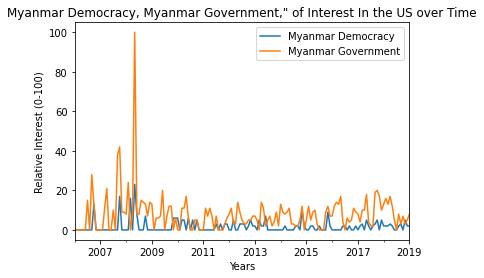

In [14]:
# Plotting EIU data
gapminder_data_manipulation.plot_chosen_countries([threshold_list[2]])
# Plotting pytrend data
kw_list_myanmar_terms = ["Myanmar Democracy", "Myanmar Government"]
myanmar_data_terms = plot_country.country_data_pytrend(kw_list_myanmar_terms)
plot_country.make_plots(myanmar_data_terms, kw_list_myanmar_terms)

> When analyzing the graphs visually, there doesn't seem to be a 'direct' relationship between the democracy index data and the google trends data. A change in the democracy index data (2011-2015) has a spike after the high interest in the google trends data (2007-2009). This does not mean there isn't relationship in the data, though more analysis would be required. 

[51, 86, 102, 149]


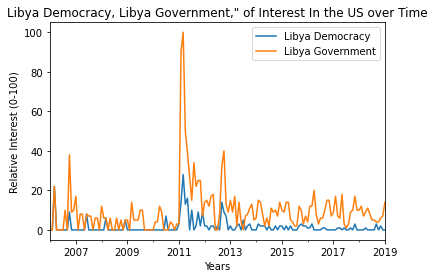

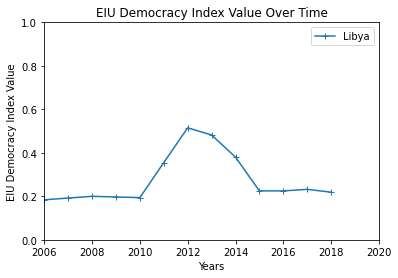

In [63]:
# Plotting EIU data
threshold_list = gapminder_data_manipulation.get_greatest_variance_countries(0.09)
gapminder_data_manipulation.plot_chosen_countries([threshold_list[1]])

# Plotting pytrend data
kw_list_libya_terms = ["Libya Democracy", "Libya Government"]
libya_data_terms = plot_country.country_data_pytrend(kw_list_libya_terms)
plot_country.make_plots(libya_data_terms, kw_list_libya_terms)

> When analyzing the graphs, there is seems to be a 'direct' relationship between the democracy index data and the google trends data. A change in the democracy index data simultaneously has a spike in the google trends data. Libya's democracy index increases about .3, and during this time, there is a massive spike of interest on Google.  

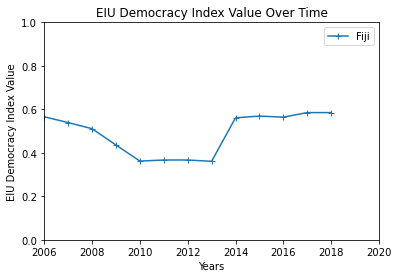

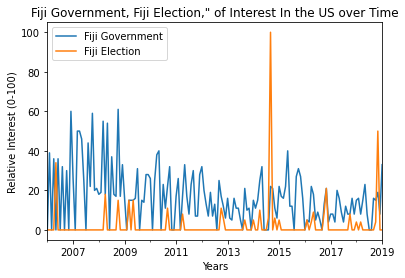

In [15]:
# Plotting EIU data
gapminder_data_manipulation.plot_chosen_countries([threshold_list[0]])

# Plotting pytrend data
kw_list_fiji_terms = ["Fiji Government", "Fiji Election"]
fiji_data_terms = plot_country.country_data_pytrend(kw_list_fiji_terms)
plot_country.make_plots(fiji_data_terms, kw_list_fiji_terms)

> When analyzing the graphs visually, there seems to be a relationship between the democracy index data and the google trends data. A change in the democracy index data almost always has a spike simultaneously in the google trends data. Fiji's democracy index decreases from 2007-2010, and there is some interest in "Fiji Government" in Google. In 2013, Fiji's EIU index increase, and shortly after, in 2014, there is a spike in searches for "Fiji ELection."

> To further analyze the potential relationship of the data, the rate of change for each data set was plotted as line graphs to compare the magnitude of the changes. The function `get_rates()` was used to find the rate of change of democracy indexes for the countries chosen by `get_greatest_variance_countries()`. The function `plot_rate_chosen_countries` was used to plot this rate data as a line graph.

> Since the interest over time data was very noisy, we decided to take a rolling average with a percent change. The function `rolling_average_pct()` calculates and plots this data. This function takes three parameters, the pytrends data frame, the country list, and the number of months to take the rolling average. We used 12 months because this would have a similar resoltuion to the EIU data.

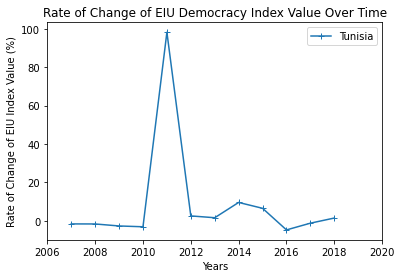

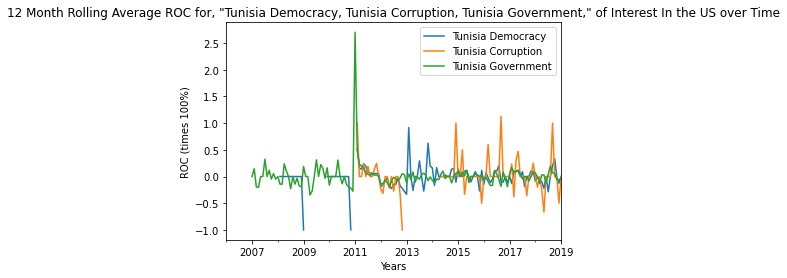

In [68]:
gapminder_data_manipulation.plot_rate_chosen_countries([threshold_list[3]])
plot_country.rolling_average_pct(tunisia_data_terms, kw_list_tunisia_terms, 12)

> Here we can visually see the rate of changes being somewhat similar. The EIU rate of change is almost 100% in 2011, and then the interest rate of change is 250% for government. We can also see in 2013, the same thing happen, though on a smaller scale. > Here we can visually see the rate of changes being similar in 2011. The EIU rate of change is over 80% in 2011, and then the interest rate of change is 200% for democracy. Interesingly, the shape of the line from 2009-2016 of the EIU data and the shape of the line of the pytrends data from 2010-2013 are very similar.

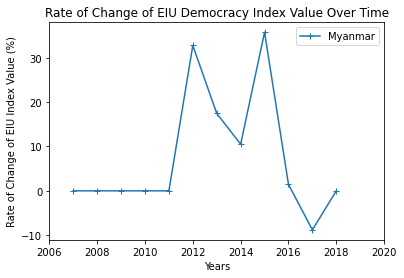

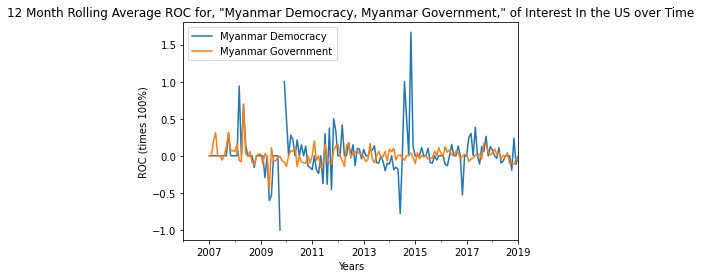

In [73]:
gapminder_data_manipulation.plot_rate_chosen_countries([threshold_list[2]])
plot_country.rolling_average_pct(myanmar_data_terms, kw_list_myanmar_terms, 12)

> Here we can visually see the rate of changes being somewhat similar after 2014. The EIU rate of change is almost 40% in 2015, and then the interest rate of change is 150% for democracy. We can also see in 2012, the same thing *seems* to happen, though on a smaller scale. Interesingly, there is a small dip in the rate of change and interest in 2017.

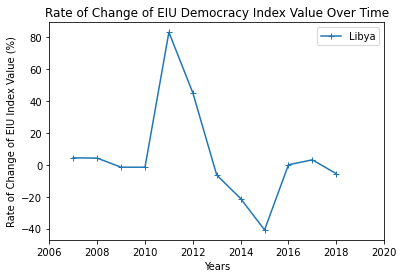

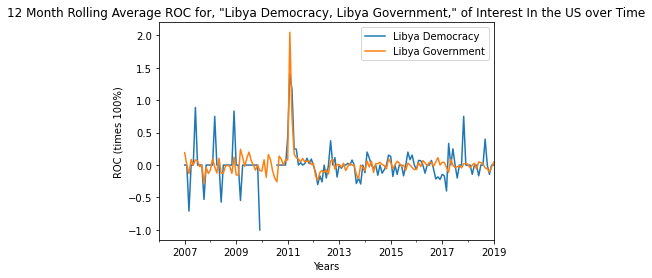

In [75]:
gapminder_data_manipulation.plot_rate_chosen_countries([threshold_list[1]])
plot_country.rolling_average_pct(libya_data_terms, kw_list_libya_terms, 12)

> Here we can visually see the rate of changes being similar in 2011. The EIU rate of change is over 80% in 2011, and then the interest rate of change is 200% for democracy. Interesingly, the shape of the line from 2009-2016 of the EIU data and the shape of the line of the pytrends data from 2010-2013 are very similar. Lastly, the magnitude of the interest is almost always much higher than the EIU data. 

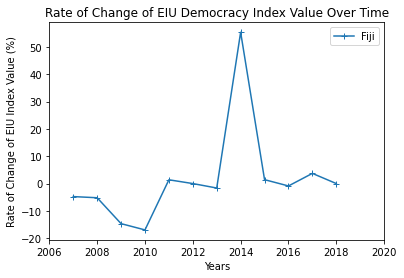

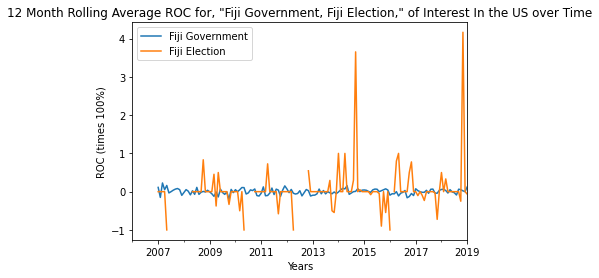

In [71]:
gapminder_data_manipulation.plot_rate_chosen_countries([threshold_list[0]])
plot_country.rolling_average_pct(fiji_data_terms, kw_list_fiji_terms, 12)

> We can see in 2015 from both sets that the rate of change increases and dips simutaneously. The rate of change in the EIU data is nearly 60%, while there is almost a 400% percent increase in 2014/2015. The spike in 2019 in the interest data is something to note, as this increase is not present in the EIU data. The search data seems to be a shorter time frame of the EIU data. Lastly, the magnitude of the interest is almost always much higher than the EIU data. 

> When comparing the line graphs from both data sets, the relationship is even clearer. When comparing the magnitudes of the rate of changes, the change in google trends is significantly greater than the change in the democracy index. This makes sense as it is much easier for a search term frequency to increase compared to the democracy index increasing.

### Conclusion
> There is a positive, somewhat strong association is present between a country’s EIU Democracy Index and its relevance in Google Searches of US users. In three out of the four countries looked at, an increase or decrease in a democracy index had a corresponding spike in google search frequency. This makes sense as a change in the democracy index is usually due to a significant event in a country, so it makes sense for individuals in the USA to search for what happened in that country. Through the rate of change graphs, we saw that changes in the democracy index had corresponding changes in the google trends data, but the changes in the google trends data occurred slightly after the democracy index change and the time frame of these changes occurred much quicker in the google trends data. We think that this relationship could indicate the google trends data is a reaction to the democracy index data, though there are many other lurking variables or external factors that could affect both of these sets. 

> We cannot conclusively determine as this is observational data that individuals in the USA are culturally aware as we would need to test several assumptions, control for many variables, and would have to set up an experiment to claim causation. 

> Through this project, our group learned two key lessons. We learned how important it is to keep our code simple. There were times where complicated code segments made it hard to collaborate as the other partner had a hard time interpreting what the segment did. Simplicity also made it much easier for us to debug our code. The second key lesson we learned was how to properly collaborate on a coding project like this. We learned how to communicate when making changes to the code and complete work asynchronously effectively.

> This project should not be used to make any claims about the cultural awareness of google users in the USA as we made many simplifications. We only looked at one data source for each data set which allows for many biases to be introduced. We also only looked at select keywords, and these keywords were chosen by us, introducing another level of bias. The various levels of bias introduced throughout the data manipulation make it unethical to draw any conclusions from the data analysis.

> Overall, we are very proud of the project as we were able to accomplish more than we thought we could initially, and we learned a lot along the way by persevering through many challenges. The question we wanted to answer and the class environment provided us the motivation to solve many of the challenges we faced. One of the greatest challenges we faced came when we tried to access and plot pandas data frames when reading from a CSV. When reading, the row index would be populated as the row header instead of the row header shown in the CSV. This made calling the data very difficult as we had to hardcode locations to call from in the CSV. Thus, we had to omit the use some functions in the plot_country file.

> If we had more time, we would make many changes to the code. We would try to make the code more versatile so that it can be used to manipulate more datasets. We would also make it so that the democracy index plot and the google trends plot were overlayed to make comparing them easier. We would also explore quantitative ways of comparing the two datasets. We can even do more with Pytrends as we could analyze any search term, and make comparisions across terms. This project could become very open ended and grow in many different directions.